In [1]:
path = 'C:/Users/ISHMO_CT/Downloads/my-projects/simple_lin_clas_env/MFPSA/datasets/Train.csv'

In [2]:
import pandas as pd
df = pd.read_csv(path)
df.head()

,event_id,precipitation,label
0,id_spictby0jfsb_X_0,0.000000,0
1,id_spictby0jfsb_X_1,0.095438,0
2,id_spictby0jfsb_X_2,1.949560,0
3,id_spictby0jfsb_X_3,3.232160,0
4,id_spictby0jfsb_X_4,0.000000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492020 entries, 0 to 492019
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_id       492020 non-null  object 
 1   precipitation  492020 non-null  float64
 2   label          492020 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 11.3+ MB


In [4]:
df.isnull().sum()

event_id         0
precipitation    0
label            0
dtype: int64

In [5]:
df.describe()

,precipitation,label
count,492020.000000,492020.000000
mean,1.565690,0.000646
std,5.489383,0.025415
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,277.346000,1.000000


In [6]:
df['label'].value_counts()

label
0    491702
1       318
Name: count, dtype: int64

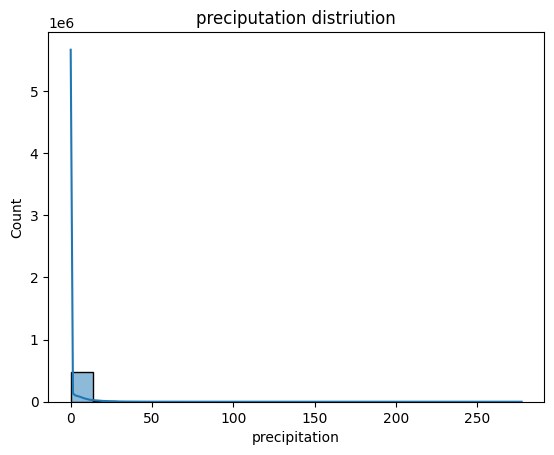

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['precipitation'], kde=True)
plt.title("preciputation distriution")
plt.show()

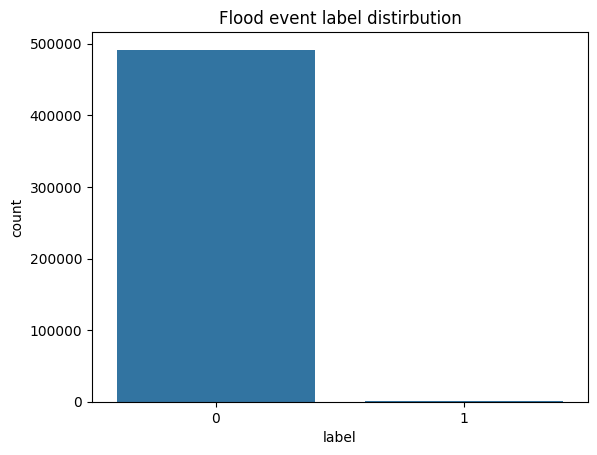

In [8]:
sns.countplot(x='label', data=df)
plt.title("Flood event label distirbution")
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['precipitation_scaled'] = scaler.fit_transform(df[['precipitation']])

In [10]:
df.head()

,event_id,precipitation,label,precipitation_scaled
0,id_spictby0jfsb_X_0,0.000000,0,-0.285222
1,id_spictby0jfsb_X_1,0.095438,0,-0.267836
2,id_spictby0jfsb_X_2,1.949560,0,0.069930
3,id_spictby0jfsb_X_3,3.232160,0,0.303581
4,id_spictby0jfsb_X_4,0.000000,0,-0.285222


In [11]:
from sklearn.model_selection import train_test_split
target = 'label'
y = df[target]
X = df[['precipitation_scaled']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     98340
           1       0.03      0.02      0.02        64

    accuracy                           1.00     98404
   macro avg       0.52      0.51      0.51     98404
weighted avg       1.00      1.00      1.00     98404



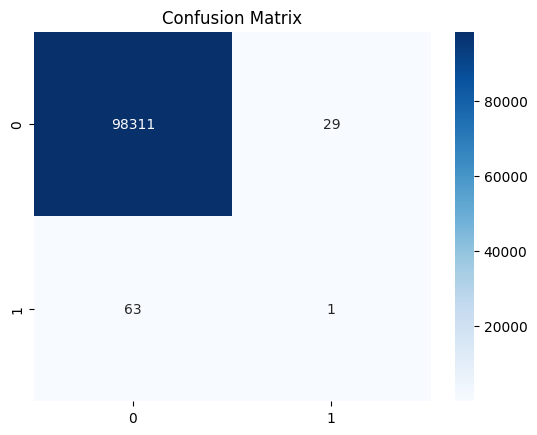

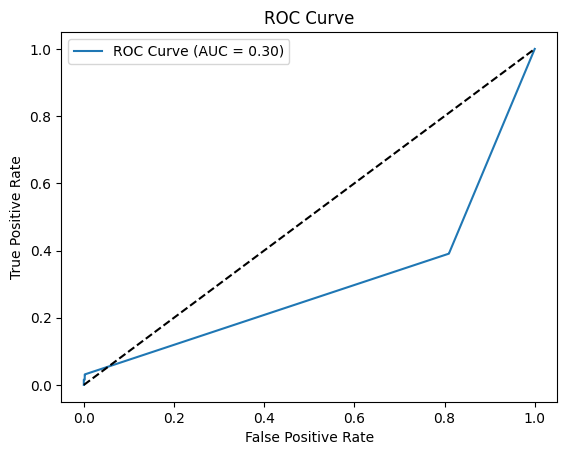

In [14]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC curve
y_prob = clf.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [15]:
test_path = 'C:/Users/ISHMO_CT/Downloads/my-projects/simple_lin_clas_env/MFPSA/datasets/Test.csv'

In [16]:
df_test = pd.read_csv(test_path)
df_test.head()

,event_id,precipitation
0,id_j7b6sokflo4k_X_0,0.00000
1,id_j7b6sokflo4k_X_1,3.01864
2,id_j7b6sokflo4k_X_2,0.00000
3,id_j7b6sokflo4k_X_3,16.61520
4,id_j7b6sokflo4k_X_4,2.56706


In [17]:
df_test['precipitation_scaled'] = scaler.fit_transform(df_test[['precipitation']]) 

In [18]:
df_test.head()

,event_id,precipitation,precipitation_scaled
0,id_j7b6sokflo4k_X_0,0.00000,-0.280833
1,id_j7b6sokflo4k_X_1,3.01864,0.222710
2,id_j7b6sokflo4k_X_2,0.00000,-0.280833
3,id_j7b6sokflo4k_X_3,16.61520,2.490767
4,id_j7b6sokflo4k_X_4,2.56706,0.147381


In [19]:

df_test_pred = clf.predict(df_test[['precipitation_scaled']])

In [20]:
df_test_pred_df = pd.DataFrame({
    'event_id': df_test['event_id'],
    'label': df_test_pred
})

df_test_pred_df.head()

,event_id,label
0,id_j7b6sokflo4k_X_0,0
1,id_j7b6sokflo4k_X_1,0
2,id_j7b6sokflo4k_X_2,0
3,id_j7b6sokflo4k_X_3,0
4,id_j7b6sokflo4k_X_4,0


In [21]:
df_test_pred_df.to_csv('submission.csv', index=False)

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# clf = RandomForestClassifier(class_weight={0: 1, 1: 100}, random_state=42)
clf = RandomForestClassifier(random_state=42)

In [34]:
clf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [35]:
pred_y_resamled = clf.predict(X_val)
print(classification_report(y_val, pred_y_resamled))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     98340
           1       0.00      0.33      0.01        64

    accuracy                           0.92     98404
   macro avg       0.50      0.62      0.48     98404
weighted avg       1.00      0.92      0.96     98404



In [27]:
pred_test_resmpled = clf.predict(df_test[['precipitation_scaled']])

In [28]:
pred_test_resmpled

array([0, 1, 0, ..., 0, 0, 0])

In [29]:
pred_test_df_res = pd.DataFrame({
    'event_id': df_test['event_id'],
    'label': pred_test_resmpled
})

In [31]:
pred_test_df_res.head()

,event_id,label
0,id_j7b6sokflo4k_X_0,0
1,id_j7b6sokflo4k_X_1,1
2,id_j7b6sokflo4k_X_2,0
3,id_j7b6sokflo4k_X_3,1
4,id_j7b6sokflo4k_X_4,0


In [32]:
pred_test_df_res.to_csv('submission.csv', index=False)